# **확률 기초**

## **1. 확률과 확률변수**

### 1-1. 필요한 패키지

- NumPy (Numerical Python):
    - 파이썬의 과학 및 수학 계산을 위한 핵심 라이브러리 중 하나
    - 다차원 배열과 행렬 연산을 위한 기본적인 기능을 제공하며, 고성능 연산을 지원함
    - 수학적 계산, 선형 대수, 푸리에 변환 및 랜덤 넘버 생성과 같은 다양한 수치 계산 작업에 사용
<br /><br />
- SciPy (Scientific Python):
    - 과학 및 공학 분야의 다양한 고급 수학, 과학 및 엔지니어링 문제를 해결하기 위한 라이브러리
    - NumPy의 기능을 기반으로 하며, 최적화, 선형 대수, 적분, 미분방정식 해법, 신호 처리 등과 같은 다양한 모듈을 포함하고 있음
    - 과학 연구 및 엔지니어링 응용 프로그램에서 많이 사용
<br /><br />
- Matplotlib:
    - 데이터 시각화와 그래프 작성을 위한 파이썬 라이브러리
    - 다양한 그래프 유형, 플롯 스타일 및 사용자 지정 옵션을 제공하여 데이터를 시각적으로 표현하는 데 사용
    - 과학 연구, 데이터 분석 및 보고서 작성 등 다양한 분야에서 널리 활용됨
<br /><br />
- SymPy:
    - 파이썬의 기호 대수 라이브러리
    - 수학적인 식과 수식을 다루는 데 사용
    - 심볼릭 계산을 지원하며, 대수적으로 연산하고, 미분, 적분, 대수 방정식 해법 등을 수행할 수 있음
    - 수학 교육, 기호 연산을 필요로 하는 엔지니어링 및 물리학 연구 등에서 유용하게 활용됨
<br /><br />
- 이러한 라이브러리들은 각자의 특징과 강점을 가지고 있으며, 다양한 과학 및 엔지니어링 분야에서 파이썬을 사용하여 데이터 처리, 수학적 계산 및 시각화 작업을 수행하는 데 도움을 주고 있음

In [ ]:
# 필요한 패키지 가져오기
import numpy as np
import scipy
from scipy import linalg as la
import matplotlib.pyplot as plt
import scipy.stats as ss
import sympy

In [ ]:
# 한글출력을 위한 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# SciPy 버전 확인
scipy.__version__

'1.10.1'

## **2. 확률 밀도 함수**

- 예제: 이산형 확률 밀도 함수
    - 이항 분포
    - 성공확률이 1/2인 시행에서 총 4번을 시행했을 경우
    - 𝐴 = {0, 1, 2}의 확률을 계산해보자

In [ ]:
import scipy.special

In [ ]:
A = [0, 1, 2]
trials = 4
event_prob = 1/2

In [ ]:
np.sum(scipy.special.comb(trials, A) * event_prob ** trials)

0.6875

In [ ]:
x = sympy.Symbol('x')
PA = sympy.integrate(sympy.exp(-x), (x, 0, sympy.oo))
PA

1

In [ ]:
# 특정 이벤트의 확률 구하기
x = sympy.Symbol('x')
PA = sympy.integrate(sympy.exp(-x), (x, 0, 1))
PA

1 - exp(-1)

- 예제: 균등 분포의 분포함수
    - 구간 [0, 1]에서 정의된 균등 분포의 분포 함수를 정의하세요
    - 분포 함수를 x값에 따른 그래프를 그리세요

In [ ]:
# 해답
#1)
a, b, x = sympy.symbols('a, b, x')
x = sympy.Symbol('x')
F = sympy.Lambda((x, a, b), x/(b-a))
F(x, 0, 1)

x

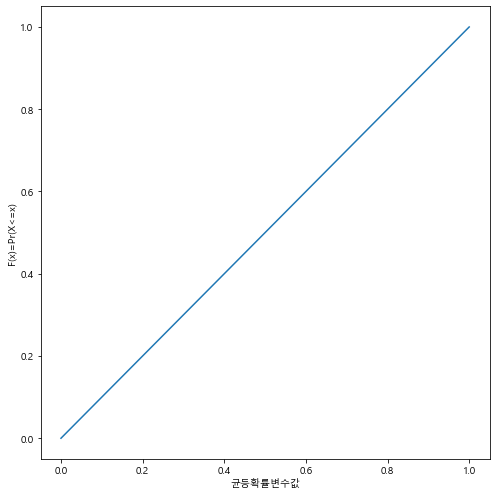

In [ ]:
# 2)
x = np.linspace(0,1, 100)
cdf_x = x

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, cdf_x)
ax.set_xlabel("균등확률변수값")
ax.set_ylabel("F(x)=Pr(X<=x)")

plt.tight_layout()

In [ ]:
# 균등 분포의 기대값 구하기
x = sympy.Symbol('x')
mu = sympy.integrate(x*1/2, (x, -1, 1))
mu

0

In [ ]:
# 분산 구하기
EX2 = sympy.integrate(x**2*1/2, (x, -1, 1))
EX2

1/3

In [ ]:
sigma2 = EX2 - mu**2
sigma2

1/3

In [ ]:
sigma = sympy.sqrt(sigma2)
sigma

sqrt(3)/3

In [ ]:
# 기대값
import sympy

a, b, x = sympy.symbols('a, b, x')
mu = sympy.integrate(x/(b-a), (x, a, b))
mu.simplify().together()

(a + b)/2

In [ ]:
# 제곱 기대값
EX2 = sympy.integrate(x**2/(b-a), (x, a, b))
EX2.simplify().factor()

(a**2 + a*b + b**2)/3

In [ ]:
# 분산 계산
sigma2 = EX2 - mu**2
sigma2.simplify().factor()

(a - b)**2/12

In [ ]:
# 적률 함수를 이용한 평균, 분산 구하기
mu, sigma, t = sympy.symbols('mu, sigma, t')
m_gen= sympy.exp(mu*t + (sigma**2 * t**2)/2)
# 1차 적률 구하기
m_gen.diff(t)

(mu + sigma**2*t)*exp(mu*t + sigma**2*t**2/2)

In [ ]:
# 1차 적률: t=0
m_gen_func = sympy.Lambda(t, m_gen.diff(t))
EX = m_gen_func(0)
EX

mu

In [ ]:
# 2차 적률 구하기
m_gen.diff(t, 2)

(sigma**2 + (mu + sigma**2*t)**2)*exp(t*(mu + sigma**2*t/2))

In [ ]:
m_gen_func = sympy.Lambda(t, m_gen.diff(t, 2))
# 2차 적률: t=0
EX2 = m_gen_func(0)
EX2

mu**2 + sigma**2

In [ ]:
# 분산
EX2 - EX**2

sigma**2

## **3. 조건부 확률과 독립**

In [ ]:
# 필요한 패키지
import numpy as np
import scipy
from scipy import linalg as la
import matplotlib.pyplot as plt

import scipy.stats as ss
import sympy

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 필요한 패키지 2
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
import pgmpy
pgmpy.__version__

'v0.1.9'

### 3-1. 주변 분포와 조건부 분포

In [ ]:
# 결합 확률 정의
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

prob = list()
for i in np.arange(1, 4):
    for j in np.arange(1,3):
        prob.append((i+j)/21)

fxy = JPD(['X1', 'X2'],[3, 2], prob)
print(fxy)

+-------+-------+------------+
| X1    | X2    |   P(X1,X2) |
+=======+=======+============+
| X1(0) | X2(0) |     0.0952 |
+-------+-------+------------+
| X1(0) | X2(1) |     0.1429 |
+-------+-------+------------+
| X1(1) | X2(0) |     0.1429 |
+-------+-------+------------+
| X1(1) | X2(1) |     0.1905 |
+-------+-------+------------+
| X1(2) | X2(0) |     0.1905 |
+-------+-------+------------+
| X1(2) | X2(1) |     0.2381 |
+-------+-------+------------+


In [ ]:
# 확률 밀도 함수 확인
np.sum(fxy.values)

1.0

In [ ]:
# 주변 확률 구하기
fx = fxy.marginal_distribution(['X1'], inplace=False)
print(fx)

+-------+---------+
| X1    |   P(X1) |
+=======+=========+
| X1(0) |  0.2381 |
+-------+---------+
| X1(1) |  0.3333 |
+-------+---------+
| X1(2) |  0.4286 |
+-------+---------+


- [예제] $X_1=1$ 일 때 $X_2$ 의 조건부 확률

In [ ]:
prob = fxy.conditional_distribution([('X1', 0)], inplace=False)
print(prob)

+-------+---------+
| X2    |   P(X2) |
+=======+=========+
| X2(0) |  0.4000 |
+-------+---------+
| X2(1) |  0.6000 |
+-------+---------+


### 3-2. 상관계수

In [ ]:
# 결합확률 정의
prob = np.array([2, 4, 3, 1, 1, 4])/15
fxy = JPD(['X', 'Y'],[2, 3], prob)
print(fxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1333 |
+------+------+----------+
| X(0) | Y(1) |   0.2667 |
+------+------+----------+
| X(0) | Y(2) |   0.2000 |
+------+------+----------+
| X(1) | Y(0) |   0.0667 |
+------+------+----------+
| X(1) | Y(1) |   0.0667 |
+------+------+----------+
| X(1) | Y(2) |   0.2667 |
+------+------+----------+


In [ ]:
# 확률 분포 확인
np.sum(fxy.values)

1.0

In [ ]:
# X 주변 확률 구하기
fx = fxy.marginal_distribution(['X'], inplace=False)
print(fx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [ ]:
# X의 기대값 구하기
x = np.array([1, 2])
EX = np.dot(x,fx.values )
EX.round(3)

1.4

In [ ]:
# X의 제곱 기대값 구하기
EXX = np.dot(x*x, fx.values)
EXX.round(3)

2.2

In [ ]:
# X의 표준편차 구하기
SDX = np.sqrt(EXX-EX**2)
SDX.round(3)

0.49

In [ ]:
# Y의 주변 분포, 기대값, 제곱합, 표준편차

# Y의 주변 분포
fy = fxy.marginal_distribution(['Y'], inplace=False)

# Y의 기대값
y = np.array([1, 2, 3])
EY = np.dot(y,fy.values )

# Y의 제곱 기대값
EYY = np.dot(y*y, fy.values)

# Y의 표준편차
SDY = np.sqrt(EYY-EY**2)

In [ ]:
# 공분산 구하기
# xy 값 구성
xy = np.outer(x, y).reshape(-1,)
xy

array([1, 2, 3, 2, 4, 6])

In [ ]:
# XY 기대값
EXY = np.dot(xy, fxy.values.reshape(-1, ))
EXY.round(3)

3.267

In [ ]:
# 공분산 계산
CovXY = EXY - EX*EY
CovXY.round(3)

0.093

In [ ]:
# 상관계수 값
rho = CovXY / (SDX * SDY)
rho.round(3)

0.247

In [ ]:
# 두 변수 간의 독립성 여부 확인
fxy.check_independence(['X'], ['Y'])

False

## **4. 표본 분포**

In [ ]:
# 필요한 패키지
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy
from scipy import linalg as la
import scipy.stats as ss
import scipy.special

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 필요한 패키지 2
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
import sympy

scipy.__version__

'1.3.2'

In [ ]:
# 데이터 구성
# [HFWS] 데이터: “가계금융복지조사( 2017년 이후) > 가구마스터(제공)[2018가구금융복지조사]”
df = pd.read_csv('https://github.com/bong-ju-kang/kmu-mba-statistics/raw/master/Data/MDIS_2018_HFWS.txt',
                 header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,2018,10200261,P,1127.905175,NaN,2255.0,G2,1,2,G1,...,NaN,NaN,1.0,80.0,60,150,4.0,NaN,NaN,NaN
1,2018,10200371,P,2223.797699,NaN,4515.0,G1,1,4,G2,...,NaN,NaN,1.0,70.0,150,200,4.0,NaN,NaN,NaN


In [ ]:
# 가구당 연간 소득액: 110번째
income = df[109]
np.round(np.mean(income), 1)

5364.0

In [ ]:
# 모집단으로 가정
# 모 평균, 모 표준편차
np.round([np.mean(income),np.std(income, ddof=0)], 1 )

array([5364. , 5818.4])

In [ ]:
# 크기가 100인 임의 표본 1개의 표본 평균
size = 100
np.random.seed(1)

# 비복원 추출
index = np.random.choice(len(income), size, replace=False)

sample_mean = np.mean(income[index])
np.round(sample_mean, 1)

5323.1

In [ ]:
# 표본 비율
np.round(size / len(income), 4)

0.0054

In [ ]:
# 표본평균의 평균
num_samples = 1000
size = 100
result = []

np.random.seed(123)
for i in np.arange(num_samples):
    index = np.random.choice(len(income), size, replace=False)
    result.append(np.mean(income[index]))
np.round(np.mean(result), 2)

5343.76

In [ ]:
# 이항분포의 평균의 분포

# 이항 분포 모수 정의
num_samples = 100
trials = 1000
event_prob = 1/6
size = 5

# 기대값
expected_count = trials * event_prob
np.round(expected_count, 2)

166.67

In [ ]:
# 표본 성공건수의 평균
result = []

np.random.seed(1234)
for i in np.arange(num_samples):
    value = np.random.binomial(n=trials, p=event_prob, size=size)
    result.append(np.mean(value))

np.round(np.mean(result), 2)

166.23

In [ ]:
# CLT를 이용한 확률 계산
z = (30-100*1/5)/np.sqrt(100*1/5*4/5)
prob = 1 - ss.norm.cdf(z)
prob.round(4)

0.0062

## **5. 평균**

- 파이썬

In [ ]:
x_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]

n = len(x_list)
sum_x = 0
for x in x_list:
    sum_x += x
mean_x = sum_x/n
print(mean_x)

5.0


In [ ]:
def mean(x_list):
    """
    리스트 x_list 원소의 평균 구하기
    입력값: 리스트 x_list
    출력값: 평균 res
    """
    n = len(x_list)
    sum_x = 0
    for x in x_list:
        sum_x += x
    res = sum_x/n
    return res

In [ ]:
x_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]

res = mean(x_list)
print(res)

5.0


- Numpy

In [ ]:
import numpy as np

x_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]
mean_x = np.mean(x_list)
print(mean_x)

5.0


## **6. 분산과 표준편차**

- 파이썬

In [ ]:
def mean(x_list):
    """
    리스트 x_list 원소의 평균 구하기
    입력값: 리스트 x_list
    출력값: 평균 res
    """
    n = len(x_list)
    sum_x = 0
    for x in x_list:
        sum_x += x
    res = sum_x/n
    return res

In [ ]:
x_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]

n = len(x_list)
mean_x = mean(x_list)
ss_x = 0

for x in x_list:
    ss_x += (x-mean_x)**2

var_x = ss_x/(n-1)
print(var_x)

7.5


In [ ]:
std_x = var_x**0.5
print(std_x)

2.7386127875258306


In [ ]:
def var(x_list):
    """
    리스트 x_list 원소의 분산 구하기
    입력값: 리스트 x_list
    출력값: 분산 res
    """
    n = len(x_list)
    mean_x = mean(x_list)
    ss_x = 0

    for x in x_list:
        ss_x += (x-mean_x)**2

    res = ss_x/(n-1)
    return res

def std(x_list):
    """
    리스트 x_list 원소의 표준 편차 구하기
    입력값: 리스트 x_list
    출력값: 표준 편차 res
    """
    var_x = var(x_list)
    res = var_x**0.5
    return res

In [ ]:
x_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]

var_x = var(x_list)
std_x = std(x_list)
print(var_x)
print(std_x)

7.5
2.7386127875258306


- Numpy

In [ ]:
import numpy as np

x_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]

var_x = np.var(x_list, ddof=1)
std_x = np.std(x_list, ddof=1)
print(var_x)
print(std_x)

7.5
2.7386127875258306


In [ ]:
var_x = np.var(x_list)
std_x = np.std(x_list)
print(var_x)
print(std_x)

6.666666666666667
2.581988897471611


## **7. 공분산**

- 파이썬

In [ ]:
def mean(x_list):
    """
    리스트 x_list 원소의 평균 구하기
    입력값: 리스트 x_list
    출력값: 평균 res
    """
    n = len(x_list)
    sum_x = 0
    for x in x_list:
        sum_x += x
    res = sum_x/n
    return res

def var(x_list):
    """
    리스트 x_list 원소의 분산 구하기
    입력값: 리스트 x_list
    출력값: 분산 res
    """
    n = len(x_list)
    mean_x = mean(x_list)
    ss_x = 0

    for x in x_list:
        ss_x += (x-mean_x)**2

    res = ss_x/(n-1)
    return res

def std(x_list):
    """
    리스트 x_list 원소의 표준 편차 구하기
    입력값: 리스트 x_list
    출력값: 표준 편차 res
    """
    var_x = var(x_list)
    res = var_x**0.5
    return res

In [ ]:
x1_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]
x2_list = [3, 1, 2, 7, 3, 8, 3, 4, 5]

n = len(x1_list)

m1 = mean(x1_list)
m2 = mean(x2_list)

sm = 0

for i in range(0, n):
    sm += (x1_list[i]-m1)*(x2_list[i]-m2)

covariance = sm/(n-1)
print(covariance)

-0.75


In [ ]:
std1 = std(x1_list)
std2 = std(x2_list)
corr = covariance/(std1*std2)
print(corr)

-0.11952286093343938


In [ ]:
def cov(x1_list, x2_list):
    """
    리스트 x_list 원소의 공분산 구하기
    입력값: 리스트 x_list
    출력값: 공분산 res
    """
    n = len(x1_list)

    m1 = mean(x1_list)
    m2 = mean(x2_list)

    sm = 0
    for i in range(0, n):
        sm += (x1_list[i]-m1)*(x2_list[i]-m2)

    res = sm/(n-1)
    return res

def corrcoef(x1_list, x2_list):
    """
    리스트 x_list 원소의 상관 계수 구하기
    입력값: 리스트 x_list
    출력값: 상관 계수 res
    """
    covariance = cov(x1_list, x2_list)
    std1 = std(x1_list)
    std2 = std(x2_list)
    res = covariance/(std1*std2)
    return res

In [ ]:
x1_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]
x2_list = [3, 1, 2, 7, 3, 8, 3, 4, 5]

covariance = cov(x1_list, x2_list)
corr = corrcoef(x1_list, x2_list)

print(covariance)
print(corr)

-0.75
-0.11952286093343938


- Numpy

In [ ]:
import numpy as np

x1_list = [2, 4, 6, 1, 5, 7, 9, 8, 3]
x2_list = [3, 1, 2, 7, 3, 8, 3, 4, 5]

covariance = np.cov(x1_list, x2_list)
print(covariance)

[[ 7.5  -0.75]
 [-0.75  5.25]]


In [ ]:
corr = np.corrcoef(x1_list, x2_list)
print(corr)

[[ 1.         -0.11952286]
 [-0.11952286  1.        ]]
